In [1]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 4.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=5b3b8a9a477b9fc082bb5b94911a8a29211474ca20b798a305cc68378b6c1615
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=86d44b53bb47ddbd1ee381fdecef0129365d9929b4e06fe56e0bc42f12e8e387
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale = 1/255)



val_datagen = ImageDataGenerator(rescale = 1/255)

In [4]:
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/CNN/test_set',
                                                 target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)


test_data = test_datagen.flow_from_directory("/content/drive/MyDrive/CNN/CNN/training_set",
                                                           batch_size=32,
                                                           target_size=(64,64),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)


val_data =  val_datagen.flow_from_directory('/content/drive/MyDrive/CNN/CNN/validation_set',
                                            batch_size=32,
                                            target_size=(64,64),
                                            class_mode='sparse',
                                            shuffle=True,seed=1)
                                           

Found 20 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
classes = {0:"hemmorhage_data",1:"non_hemmorhage_data"}
for i in classes.items():
    print(i)

(0, 'hemmorhage_data')
(1, 'non_hemmorhage_data')


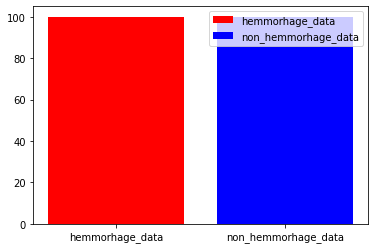

In [6]:
fig, ax = plt.subplots()
ax.bar("hemmorhage_data",100,label="hemmorhage_data",color="r")
ax.bar("non_hemmorhage_data",100,label="non_hemmorhage_data",color="b")
ax.legend()

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [8]:
#compile model
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


#early stop 
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [9]:
#fit the model
history=model.fit(train_data,
    validation_data = val_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.6911 - accuracy: 0.5000 - val_loss: 0.6836 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 787ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6806 - val_accuracy: 0.6000
Epoch 3/50
1/1 [==============================] - 1s 772ms/step - loss: 0.6824 - accuracy: 0.6500 - val_loss: 0.6697 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 766ms/step - loss: 0.6697 - accuracy: 0.5000 - val_loss: 0.6581 - val_accuracy: 0.5500
Epoch 5/50
1/1 [==============================] - 1s 740ms/step - loss: 0.6525 - accuracy: 0.6000 - val_loss: 0.6473 - val_accuracy: 0.5250
Epoch 6/50
1/1 [==============================] - 1s 770ms/step - loss: 0.6447 - accuracy: 0.6000 - val_loss: 0.6412 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 1s 743ms/step - loss: 0.6205 - accuracy: 0.5000 - val_loss: 0.6103 - val_accuracy: 0.7250
Epoch 8/50
1/1 [=====

In [10]:
#evaluate model
model.evaluate(test_data)

5/5 [==============================] - 37s 9s/step - loss: 0.9444 - accuracy: 0.6643


[0.9444177746772766, 0.6642857193946838]

In [11]:
#predict model
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred,axis=1)

y_pred 

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0])

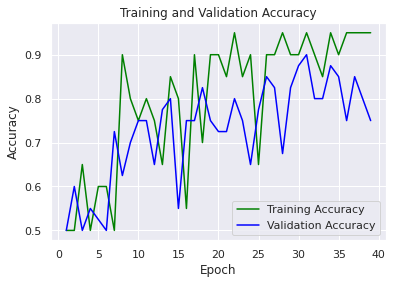

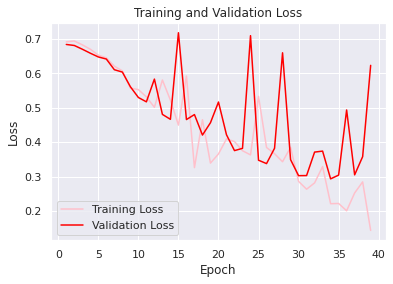

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


[[1. 0.]]
[0]
hemmorhage_data


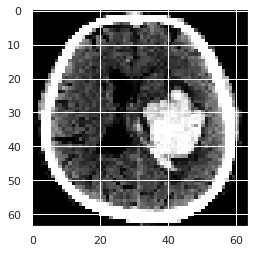

In [15]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/CNN/CNN/test_set/hemmorhage_data/003.png"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[[1. 0.]]
[0]
hemmorhage_data


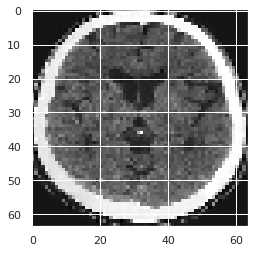

In [16]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/CNN/CNN/training_set/non_hemmorhage_data/130.png"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)

[1]
non_hemmorhage_data


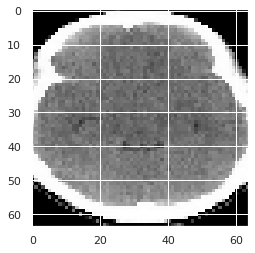

In [17]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/CNN/CNN/validation_set/non_hemmorhage_data/107.png"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)